In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

country_profiles_file = "country_profile_variables.csv"



In [36]:
# loading csv file and putting into dataframe

country_data = pd.read_csv(country_profiles_file)
country_data.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [37]:
# headers = list(country_data.columns.values)
# print(headers)

In [38]:
# GDP: Gross domestic product (million current US$), 
# GDP per capita (current US$), 


# Seats held by women in national parliaments %,
# Labour force participation (female/male pop. %)

# Threatened species (number),
# Forested area (% of land area)
# CO2 emission estimates (million tons/tons per capita)
# Pop. using improved drinking water (urban/rural, %)
# Pop. using improved sanitation facilities (urban/rural, %)
# Energy production, primary (Petajoules)

In [39]:
gender_df = pd.DataFrame(country_data.loc[:,["country", "GDP: Gross domestic product (million current US$)", "GDP per capita (current US$)", 'Seats held by women in national parliaments %', 'Labour force participation (female/male pop. %)']])
gender_df = gender_df.set_index("Labour force participation (female/male pop. %)")
gender_df = gender_df.rename(columns={"country": "Country"})

# Cleaning the data to drop values ".../..." and "-99".
gender_df = gender_df.dropna(how="any")
gender_df = gender_df.drop(".../...", axis = 0)
gender_df = gender_df.drop("-99", axis = 0)
gender_df = gender_df.reset_index()
gender_df = gender_df.set_index("Country")
gender_df.head()

,Labour force participation (female/male pop. %),GDP: Gross domestic product (million current US$),GDP per capita (current US$),Seats held by women in national parliaments %
Country,,,,
Afghanistan,19.3/83.6,20270,623.2,27.7
Albania,40.2/61.0,11541,3984.2,22.9
Algeria,17.0/70.7,164779,4154.1,31.6
Angola,59.8/77.1,117955,4714.1,38.2
Argentina,48.6/74.4,632343,14564.5,38.9


In [40]:
# splitting labour force participation to seperate columns
gender_list = list(gender_df["Labour force participation (female/male pop. %)"])
new_gender_list = [value.split("/") for value in gender_list]
male_part = [float(value[0]) for value in new_gender_list]
female_part = [float(value[1]) for value in new_gender_list]

# print(new_gender_list)
# print(male_part)
# print(female_part)

In [42]:
# adding new columns into dataframe
gender_df.drop(["Labour force participation (female/male pop. %)"], axis = 1, inplace = True)
gender_df["Male Labour Force Participation %"] = male_part
gender_df["Female Labour Force Participation %"] = female_part
gender_df.head()

,GDP: Gross domestic product (million current US$),GDP per capita (current US$),Seats held by women in national parliaments %,Male Labour Force Participation %,Female Labour Force Participation %
Country,,,,,
Afghanistan,20270,623.2,27.7,19.3,83.6
Albania,11541,3984.2,22.9,40.2,61.0
Algeria,164779,4154.1,31.6,17.0,70.7
Angola,117955,4714.1,38.2,59.8,77.1
Argentina,632343,14564.5,38.9,48.6,74.4


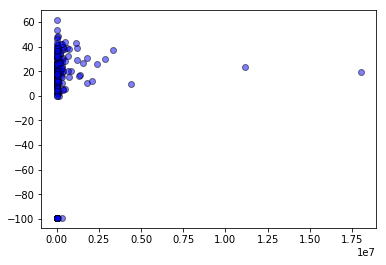

In [43]:
plt.scatter(gender_df["GDP: Gross domestic product (million current US$)"], gender_df["Seats held by women in national parliaments %"], marker = "o", color = "blue", edgecolor = "black", alpha = 0.5)